<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

In [1]:
import numpy as np
import os
import glob
import shutil
import math
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy.random as rnd


## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [2]:
np.random.normal(loc = 5, scale = 2, size = 10)

array([6.64812883, 3.75445732, 6.52766612, 0.31958373, 1.03949796,
       5.7919813 , 2.9788123 , 6.11162794, 4.35102418, 3.81790331])

### 1.2 Visualising the random numbers

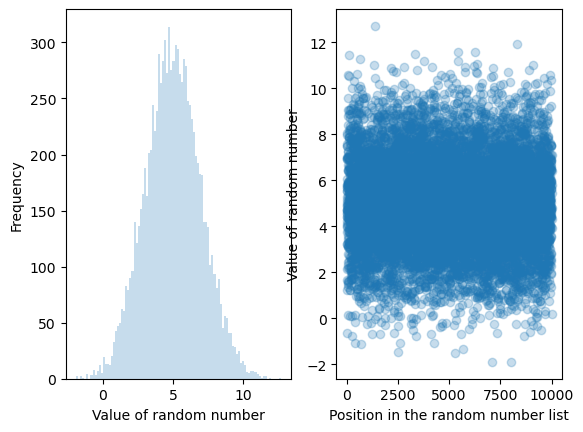

In [3]:
n = 1_000_0
random_numbers = np.random.normal(loc = 5, scale = 2, size = n)

fig, ax = plt.subplots(nrows = 1, ncols = 2)

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel('Value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .25)
axis.set_xlabel('Position in the random number list')
axis.set_ylabel('Value of random number')

plt.show()

### 1.3 68%?

In [6]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc = mean, scale = sd, size = n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 68.17%


## 1 Brownian Motion in 1D

### 1.1 The scenario

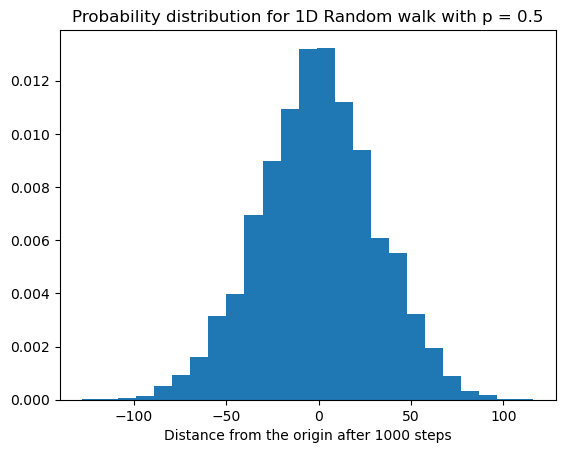

In [12]:
def brown_1d(prob_right = .5, no_of_steps = 10000):
    
    # This function returns the final position of the particle after the number of steps.
    # prob_right is the probability of going right
    
    step_size = 1
    x = 0 # starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right: # Go right?
            x += step_size
        else:
            x -= step_size
            
    return x

# repeat and experiment of 1000 steps, 10,000 times to see what I get

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps) for _ in range(repeats)]

plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')

plt.show()

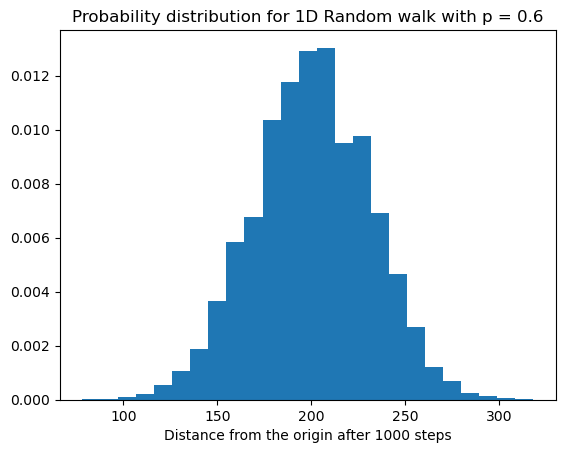

In [13]:
def brown_1d(prob_right = .5, no_of_steps = 10000):
    
    # This function returns the final position of the particle after the number of steps.
    # prob_right is the probability of going right
    
    step_size = 1
    x = 0 # starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right: # Go right?
            x += step_size
        else:
            x -= step_size
            
    return x

# repeat and experiment of 1000 steps, 10,000 times to see what I get

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps) for _ in range(repeats)]

plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')

plt.show()

### 1.2 The simulation

In [ ]:

# Your code here


### 1.3 What does theory say?

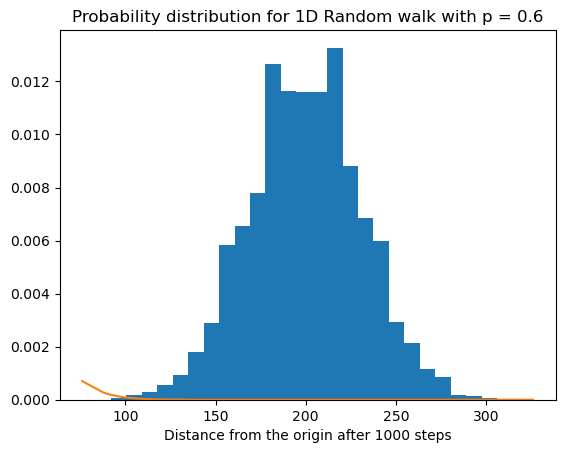

In [23]:
def normal(x, m = 0, s = 1):
    # Probability density function for the Gaussian distribution
    
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_left = 1 - prob_right                        # q = 1 - p
mean = no_of_steps * (prob_right - prob_left)     # mean = N(p-q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left)  #sd = sqrt(4Npq)
x = np.unique(results)                            # numbers that form the x-axis



def brown_1d(prob_right = .5, no_of_steps = 10000):
    
    # This function returns the final position of the particle after the number of steps.
    # prob_right is the probability of going right
    
    step_size = 1
    x = 0 # starting x position
    
    for _ in range(no_of_steps):
        if rnd.random() < prob_right: # Go right?
            x += step_size
        else:
            x -= step_size
            
    return x

# repeat and experiment of 1000 steps, 10,000 times to see what I get

no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right = p, no_of_steps = no_of_steps) for _ in range(repeats)]

plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')
plt.plot(x, normal(x, mean, sd), label = 'Theoretical')

plt.show()

## 2 Estimating \(\pi\)

### 2.1 The method

### 2.2 A poor but intuitive solution

In [3]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low = -1, high = 1, size = 1)
    y = rnd.uniform(low = -1, high = 1, size = 1)
    r = np.sqrt(x**2 + y**2) # Distance from the origin
    
    if r<= 1:
        N_green += 1
        
4* N_green / N_total
    
    

3.13784

### 2.3 A better solution

In [4]:
N_total = 1_000_000
x = rnd.uniform(low = -1, high = 1, size =  N_total)
y = rnd.uniform(low = -1, high = 1, size = N_total)
N_green = np.sum((x**2 + y**2) <= 1)

4 * (N_green / N_total)

3.141884

In [ ]:

# Your code here


### 2.4 A smarter solution

In [5]:
N_total = 1_000_000
x = rnd.rand(N_total)
y = rnd.rand(N_total)
N_green = np.sum((x**2 + y**2) <= 1)

4*(N_green/N_total)

3.140856

In [5]:
# The only function to care about!!!!!!!

def estimate_pi(N_total):
    
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi

3.140856

## Exercise 1 :  Vital Stats of Random π

In [ ]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))

times = 100

# [value for value in estimate_pi(n = 1_000) in range(times)]

new_pi = [estimate_pi(10_000) for i in range(times)]

pi_array = np.array(new_pi)

In [ ]:
def estimate_pi(N_total):
#     N_total =  n
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))

times = 100

# [value for value in estimate_pi(n = 1_000) in range(times)]

new_pi = [estimate_pi(10_000) for i in range(times)]

pi_array = np.array(new_pi)

In [ ]:
estimate_pi(1)

In [ ]:
print(np.mean(pi_array))
print(np.std(pi_array))

In [16]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))

times = 10000

# [value for value in estimate_pi(n = 1_000) in range(times)]

new_pi = [estimate_pi(10_000) for i in range(times)]

pi_array = np.array(new_pi)

KeyboardInterrupt: 

In [ ]:
print(np.mean(pi_array))
print(np.std(pi_array))

In [2]:
array1 = np.array([1,2,3])
np.mean(array1)

2.0

In [3]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))



# [value for value in estimate_pi(n = 1_000) in range(times)]

no_of_times = []
mean_points = []

for r in range(1,6):
    times = 10**r
    no_of_times += [times]
    np.array(no_of_times) # made the number of times array
    print(no_of_times)
    
    
    new_pi = [estimate_pi(10_000) for i in range(times)]
    pi_array = np.array(new_pi)
    mean = (np.mean(pi_array))
    mean_points += mean
    np.array(mean_points)
    print(mean_points)

[10]
[]
[10, 100]
[]
[10, 100, 1000]
[]
[10, 100, 1000, 10000]


KeyboardInterrupt: 

In [4]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi

times = 100
new_pi = [estimate_pi(10_000) for i in range(times)]
print(new_pi)
print(np.mean(new_pi))

[3.142184, 3.139628, 3.143404, 3.139756, 3.143168, 3.139116, 3.14216, 3.140944, 3.141284, 3.13998, 3.14028, 3.140348, 3.138856, 3.141872, 3.140384, 3.144576, 3.140608, 3.140056, 3.144936, 3.142012, 3.14374, 3.145648, 3.140912, 3.141784, 3.1397, 3.140332, 3.140624, 3.14316, 3.141712, 3.140152, 3.141124, 3.14216, 3.14052, 3.140728, 3.141336, 3.141664, 3.140408, 3.140808, 3.139744, 3.140736, 3.140144, 3.140748, 3.1441, 3.142472, 3.141788, 3.14254, 3.1391, 3.141156, 3.142976, 3.140912, 3.142108, 3.140776, 3.143548, 3.1424, 3.141844, 3.144428, 3.13974, 3.141484, 3.138444, 3.14192, 3.139164, 3.138796, 3.139372, 3.141868, 3.141424, 3.14124, 3.141664, 3.13978, 3.14306, 3.14082, 3.142124, 3.1405, 3.14146, 3.13846, 3.142124, 3.14348, 3.140792, 3.139584, 3.141556, 3.140112, 3.1403, 3.141048, 3.14382, 3.13844, 3.140716, 3.14142, 3.14234, 3.1401, 3.143096, 3.140308, 3.139184, 3.1435, 3.141324, 3.14668, 3.141388, 3.143344, 3.141464, 3.144456, 3.142216, 3.143712]
3.14141408


KeyboardInterrupt: 

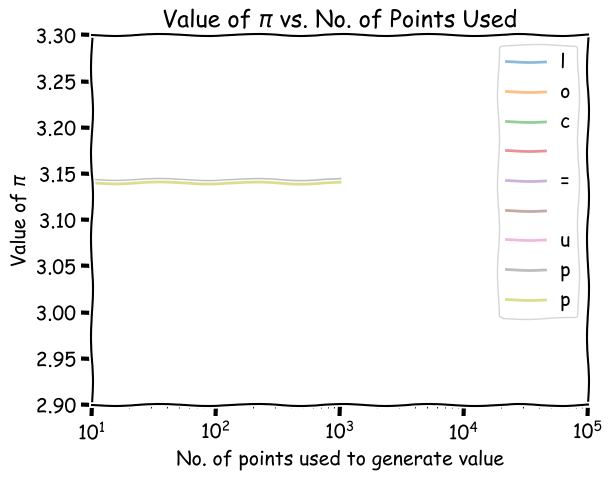

In [9]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))



# [value for value in estimate_pi(n = 1_000) in range(times)]

no_of_times = []
mean_points = []
std_error_plus = []
std_error_minus = []


for r in range(1,6):
    times = 10**r
    no_of_times += [times]
    np.array(no_of_times) # made the number of times array
    
    
    new_pi = [estimate_pi(10_000) for i in range(times)]
    
    mean = np.mean(new_pi)
    mean_points += [mean]
    np.array(mean_points)
    
    std_error = np.std(new_pi)
    err_bar_positive_value = mean + std_error
    std_error_plus += [err_bar_positive_value]
    np.array(std_error_plus)
    err_bar_negative_value = mean - std_error
    std_error_minus += [err_bar_negative_value]
    np.array(std_error_minus)
    
    plt.xkcd()
    plt.title('Value of $\pi$ vs. No. of Points Used')
    
#     plt.scatter(no_of_times, mean_points, label = 'Std. Dev. of Real $/pi$ values', alpha=.5)
    plt.plot(no_of_times, mean_points,  label = 'Std. Dev. of Real $/pi$ values', alpha=.5)
    plt.plot(no_of_times, std_error_plus, alpha=.5, fmt = 'o')
    plt.plot(no_of_times, std_error_minus, alpha=.5, fmt = 'o')
    plt.hlines(np.pi, 10**1, 10**5, colors = 'grey', ls = 'dashed', label = 'Real $\pi$'')
    plt.xscale('log')
#     plt.plot(no_of_times, new_pi, label = 'Real $\pi$', ls = 'dashed', c = 'blue' alpha=.5)
    
    plt.xlabel('No. of points used to generate value')
    plt.ylabel('Value of $\pi$')
    plt.legend('loc = upper left')
#     plt.figure(fig_size = (10,2))
    
    plt.xlim([10**1, 10**5])
    plt.ylim([2.9, 3.3])
    
    
plt.show()

In [56]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)
    
    return pi
#     return (np.mean(pi), np.std(pi))



# [value for value in estimate_pi(n = 1_000) in range(times)]

no_of_times = []
mean_points = []
pi_value = [np.pi]

for r in range(1,6):
    times = 10**r
    no_of_times += [times]
#     np.array(no_of_times)
    new_pi = [estimate_pi(10_000) for i in range(times)]
    mean = np.mean(new_pi)
    mean_points += [mean]
#     np.array(mean_points)
#     pi_array = np.array(new_pi)
#     mean = (np.mean(pi_array))
    
    standard_deviation = (np.std(pi_array))
    SD_points += [standard_deviation]
    np.array(SD_points)
#     print(mean, std)
 
plt.xkcd()
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,4))
ax.plot(no_of_times, mean_points, label = 'Real $\pi$')
            #     ax.plot(no_of_times, pi_value, label = 'Std. Dev. of Real $/pi$ values')
ax.set_xlim([10**1, 10**5])
ax.set_ylim([2.9,3.3])
ax.set_xscale('log')
ax.legend()
fig.suptitle('Value of $\pi$ vs. No. of Points Used')
    
    
fig.tight_layout()
plt.show()

KeyboardInterrupt: 

In [38]:
label = 'Std. Dev. of Real $\pi$ values',
label = 'Real $\pi$',
np.shape(times_array)

no_of_times += [times]
    times_array = 

(2,)

In [40]:
np.shape(SD_points)

(2,)

In [44]:
np.shape(mean)

()

In [48]:
no_of_times

[10]

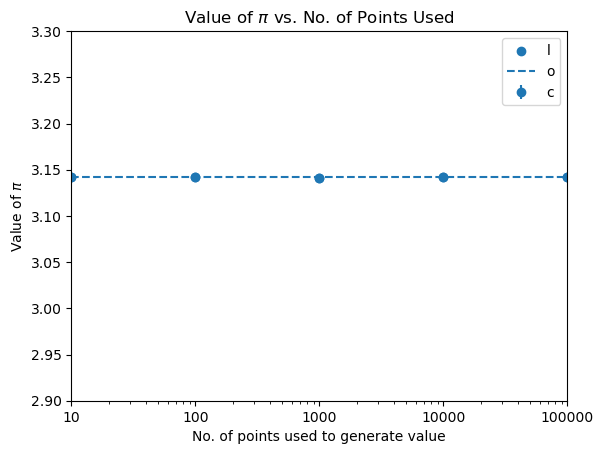

In [10]:
def estimate_pi(n):
    N_total = 1_000_000
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)

    pi = 4*(N_green/N_total)

    return pi

no_of_times = [10**i for i in range(1,6)]

mean_points = []
std_points = []
results = []

for r in no_of_times:
    result = [estimate_pi(r) for _ in range(0,100)]
    results.append(result)
    
    mean_points.append(np.mean(result))
    std_points.append(np.std(result))
    
fig, ax = plt.subplots()
ax.scatter(no_of_times, mean_points, label = 'Std. Dev. of Real $/pi$ values')
ax.set_title('Value of $\pi$ vs. No. of Points Used')
ax.set_xscale('log')
ax.set_xlim([10**1, 10**5])
ax.set_xticks([10**1, 10**2, 10**3, 10**4, 10**5])
ax.set_xticklabels([10**1, 10**2, 10**3, 10**4, 10**5])
ax.set_ylim([2.9,3.3])
ax.errorbar(no_of_times, mean_points, yerr = std_points, fmt='o')
ax.axhline(np.pi, ls = 'dashed', label = 'Real $\pi$')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.title('Value of $\pi$ vs. No. of Points Used')
ax.legend('loc = upper left')

plt.show()

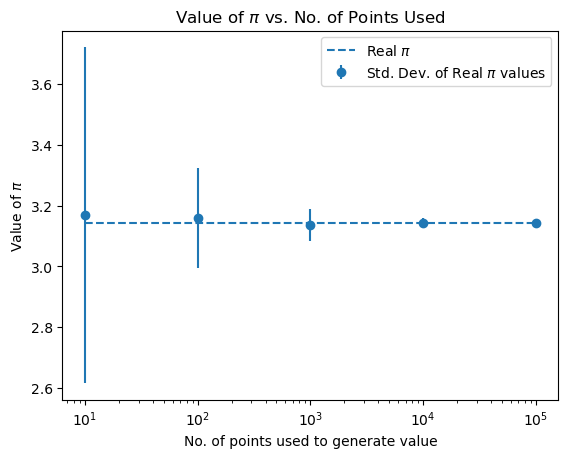

In [3]:
def estimate_pi(N_total):
    
    x = rnd.rand(N_total)
    y = rnd.rand(N_total)
    N_green = np.sum((x**2 + y**2) <= 1)
    pi = 4*(N_green/N_total)
    
    return pi

no_of_times = [10**i for i in range(1,6)]

mean_points = []
std_points = []
results = []

for N_total in no_of_times:
    result = [estimate_pi(N_total) for r in range(100)]
    results.append(result)
    
    mean_points.append(np.mean(result))
    std_points.append(np.std(result))
    
plt.errorbar(no_of_times, mean_points, yerr = std_points, fmt = 'o', label = 'Std. Dev. of Real $\pi$ values')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of $\pi$')
plt.xscale('log')
# plt.xlim([10**1, 10**5])
# plt.ylim([2.9, 3.3])
plt.title('Value of $\pi$ vs. No. of Points Used')
plt.hlines(np.pi, 10**1, 10**5, ls = 'dashed', label = 'Real $\pi$')
plt.legend()

plt.show()